In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',None)

In [3]:
#read data
flowers = pd.read_csv('../data/iris-data.csv')
flowers.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#dataset info
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#describe data before cleaning
flowers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#see unique values to know more about my data
flowers['sepal_length_cm'].unique()

array([5.1  , 4.9  , 4.7  , 4.6  , 5.   , 5.4  , 4.4  , 4.8  , 5.7  ,
       5.8  , 5.2  , 5.5  , 4.5  , 5.3  , 7.   , 6.4  , 6.9  , 6.5  ,
       6.3  , 6.6  , 5.9  , 6.   , 6.1  , 5.6  , 6.7  , 6.2  , 6.8  ,
       0.067, 0.06 , 0.057, 0.055, 7.1  , 7.6  , 7.3  , 7.2  , 7.7  ,
       7.4  , 7.9  ])

In [7]:
flowers['sepal_width_cm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [8]:
flowers['petal_length_cm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [9]:
flowers['petal_width_cm'].unique()

array([0.2, 0.4, 0.3, nan, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1,
       1.8, 1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [10]:
flowers['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [11]:
#find the null values
flowers[flowers['petal_width_cm'].isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [12]:
#clean classes so I have the 3 original classes
flowers["class"] = flowers["class"].str.replace("Iris-setossa", "Iris-setosa")
flowers["class"] = flowers["class"].str.replace("Iris-versicolor", "versicolor")
flowers["class"] = flowers["class"].str.replace("versicolor", "Iris-versicolor")

In [13]:
flowers['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#extract mean of Iris-setosa so I can replace null values with mean
iris_setosa = flowers.loc[flowers['class'] == 'Iris-setosa'] 
#iris_setosa

In [15]:
iris_setosa['petal_width_cm'].mean()

0.25111111111111106

In [16]:
#fill null values with the mean
flowers['petal_width_cm'] = flowers['petal_width_cm'].fillna(0.2)

In [17]:
#dataset info after cleaning and replacing nulls
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
#describe after cleaning and replacing nulls
flowers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202000
std,1.312781,0.433123,1.764420,0.765399
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
#One Hot Encoding
flowers_dummies = pd.get_dummies(flowers, columns = ['class']) 
flowers_dummies.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [28]:
flowers_dummies['class_Iris-setosa'] = flowers_dummies['class_Iris-setosa'].astype(int)
flowers_dummies['class_Iris-versicolor'] = flowers_dummies['class_Iris-versicolor'].astype(int)
flowers_dummies['class_Iris-virginica'] = flowers_dummies['class_Iris-virginica'].astype(int)
flowers_dummies.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [29]:
#data correlation
flowers_dummies.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
sepal_length_cm,1.000000,0.066091,0.489083,0.478309,-0.330005,-0.157130,0.487136
sepal_width_cm,0.066091,1.000000,-0.419796,-0.359476,0.595157,-0.463021,-0.132136
petal_length_cm,0.489083,-0.419796,1.000000,0.961287,-0.922688,0.201587,0.721102
petal_width_cm,0.478309,-0.359476,0.961287,1.000000,-0.886151,0.114940,0.771211
class_Iris-setosa,-0.330005,0.595157,-0.922688,-0.886151,1.000000,-0.500000,-0.500000
class_Iris-versicolor,-0.157130,-0.463021,0.201587,0.114940,-0.500000,1.000000,-0.500000
class_Iris-virginica,0.487136,-0.132136,0.721102,0.771211,-0.500000,-0.500000,1.000000


# Some visualizations to understand de dataset

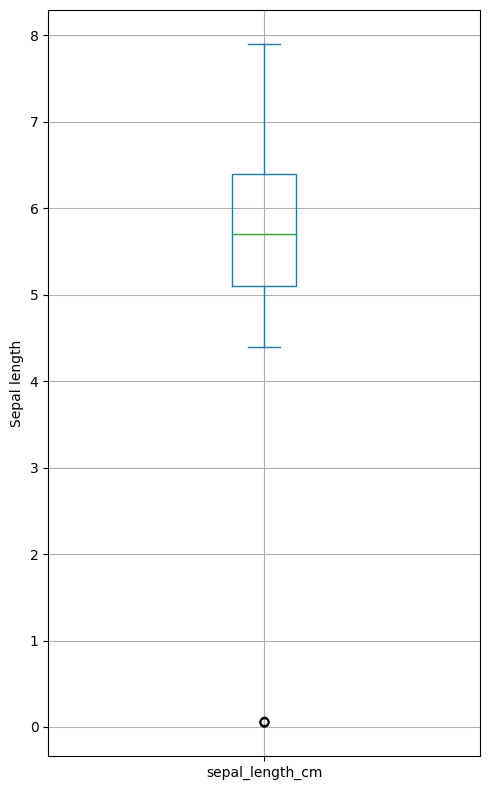

In [32]:
#some visualizations to understand de dataset
#Sepal length
data = flowers_dummies['sepal_length_cm']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Sepal length')
plt.tight_layout()
plt.grid()
plt.show()

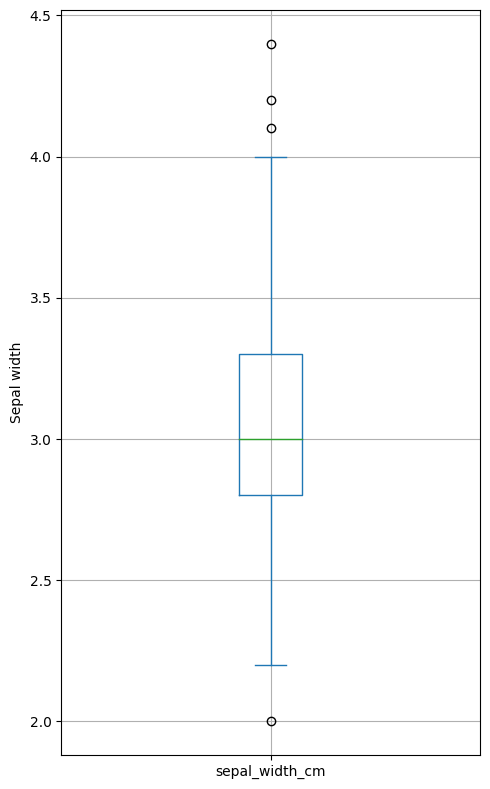

In [33]:
#Sepal width
data = flowers_dummies['sepal_width_cm']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Sepal width')
plt.tight_layout()
plt.grid()
plt.show()

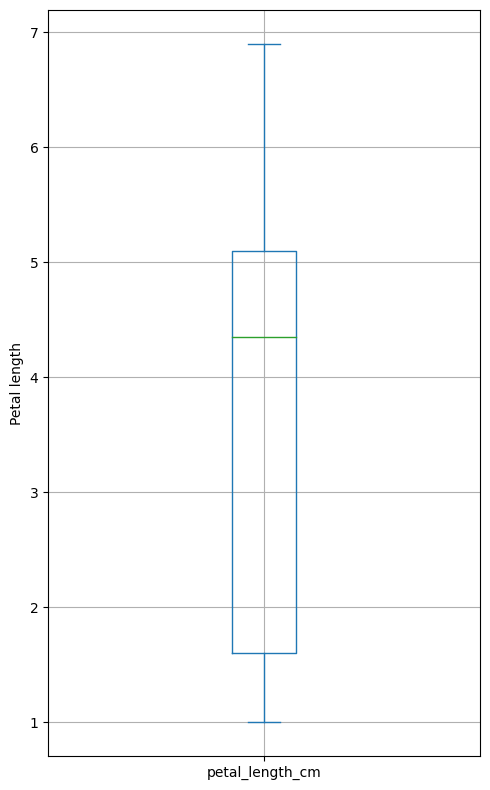

In [34]:
#Petal length
data = flowers_dummies['petal_length_cm']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Petal length')
plt.tight_layout()
plt.grid()
plt.show()

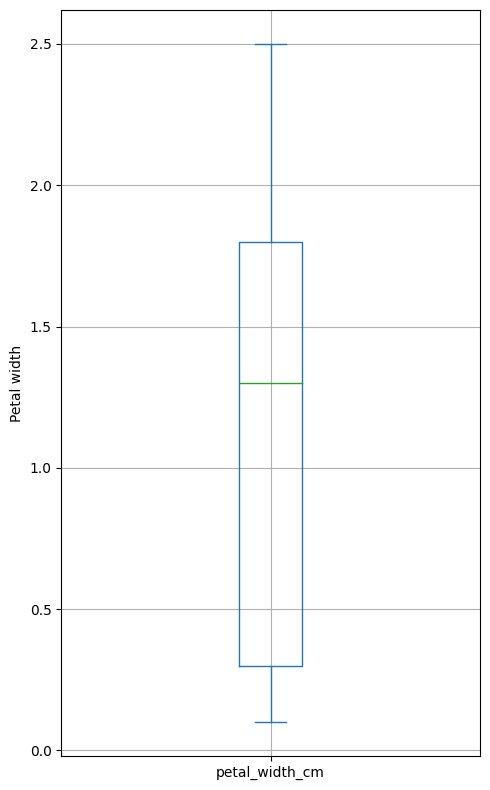

In [36]:
#Petal width
data = flowers_dummies['petal_width_cm']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Petal width')
plt.tight_layout()
plt.grid()
plt.show()

<Axes: >

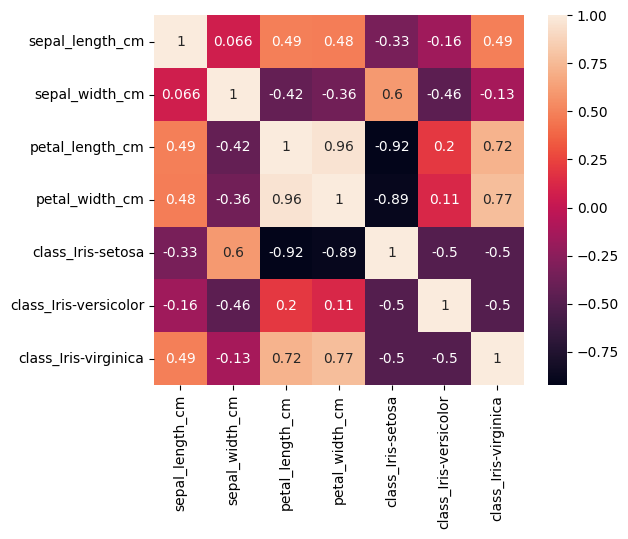

In [40]:
corr = flowers_dummies.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [47]:
#flowers_dummies.head()

Text(0.5, 1.0, 'Petal width VS Petal length')

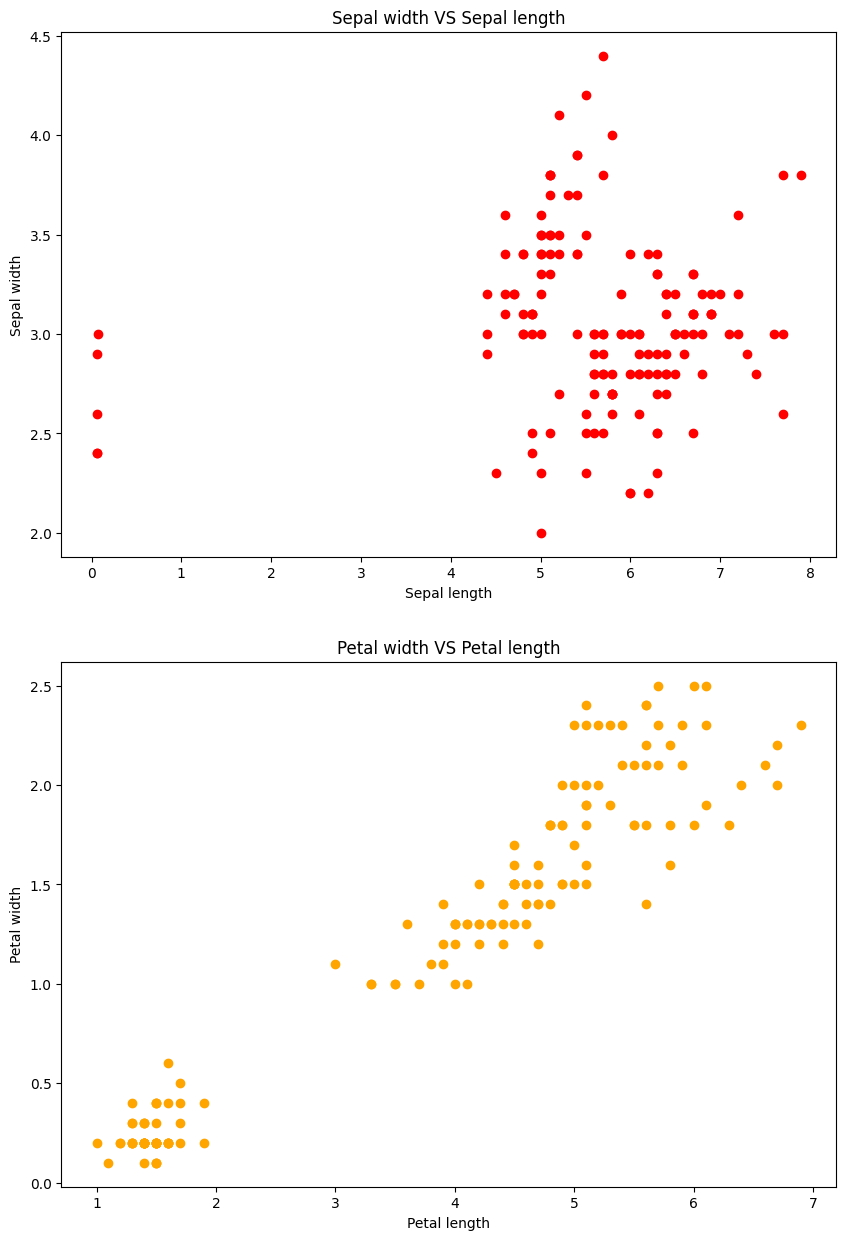

In [46]:
fig, axes = plt.subplots(nrows = 2, ncols =1, figsize=(10,15))
axes[0].scatter(flowers_dummies['sepal_length_cm'], flowers_dummies['sepal_width_cm'] , color='red')
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[0].set_title('Sepal width VS Sepal length')
axes[1].scatter(flowers_dummies['petal_length_cm'], flowers_dummies['petal_width_cm'], color='orange')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[1].set_title('Petal width VS Petal length')